<a href="https://colab.research.google.com/github/hkumar01/TwitterAnalyzer/blob/main/TwitterAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Model parsing tweets from Twitter

**Introduction**

The internet has become an ocean of data. We find data everywhere in the cyberworld as all websitea are collecting some form of data whether it is email addresses, product sales, or number of views. 

Social Media platforms are the biggest data repositories on the web as individuals will store their personal information, post pictures, and share their views. Facebook, Instagram, and Twitter are the primary social platforms today, and in particular Twitter is different because users are only allowed 280 characters per tweet (post). As a result, tweets are excellent for Natural Language Processing and Sentimental Analysis because they are primarily text only compared to Facebook and Instagram which are focused on sharing photos. 

**Purpose**

The purpose of this exploration is to analyze and perform Sentimental Analysis on a specific Twitter page which posts a certain type of content. The page is called Great Mind Quotes and each tweet is a quote from a well-known individual in history or from our society today. I chose the Great Mind Quotes page because they are an old exisiting page with a high follower count and posting several times a day.

**Reasoning**

In addition, I specifically chose to analyze and perform Sentimental Analysis on quotes because they resonate differently with all individuals. For example, individuals read quotes for various reasons such as, to be inspired, wanting to hear the harsh truth, or simply wanting friendly advice. For that reason, the quotes being posted on social pages must be applicable to a large audience. Today, often times people will set their screensaver with a quote, write a quote down on paper and place it on the wall, or even share it with friends. This made me wonder if the social media pages that post quotes are feeding positivity to people's minds. 

**Use**

By replicating this exploration, a large number of insights can be found for a selected Twitter user. For example, the overall positivity/negativity for tweets, subjectivity/objectivity of tweets, how tweets are grouped and classified, how the text used in a tweet impacts group membership, and so much more!  

# Sentimental Analysis Overview

Sentimental Analysis is the process of identifying the emotions and tone behind a writer's message. There are two properties of Sentimental Analysis in the Python TextBlob library that help determine the emotions and tone in some given text, Polarity and Subjectivity. 

1.   **Polarity** is the measure of how positive or negative a phrase/sentence is. The range of possible polarity scores falls between -1 and 1. A polarity score closer to -1 means the tweet is negative and a score closer to 1 means the tweet is positive. If the polarity score is exactly zero, it is considered neutral.
2.   **Subjectivity** is the measure of whether a phrase/sentence is more subjective (personal emotion, judgement, opinion) or objective (factual information). The subjectivity score falls on a range of 0 and 1. A subjectivity score closer to 0 means the tweet is more objective and a score closer to 1 means the tweet is more subjective.



# Setup, Authenticating Twitter API, Cleaning Data, Subjectivity/Polarity Scores

In [ ]:
#import libraries 

import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from plotnine import *
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Upload csv file with Twitter API credentials

from google.colab import files
upload = files.upload()

Saving login.csv to login.csv


In [ ]:
#Get credential data
 
log = pd.read_csv('login.csv')

In [ ]:
#Twitter API credentials 

consumerKey = log['Pass'][0]
consumerSecretKey = log['Pass'][1]
accessToken = log['Pass'][2]
accessTokenSecret = log['Pass'][3]

In [ ]:
#Authenticate Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecretKey)

#Set Access Token and secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create API Object 
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#Extracting tweets from selected Twitter account
posts = api.user_timeline(screen_name="GreatestQuotes", count=200, lang="en", tweet_mode = "extended")

i = 0

for tweet in posts[0:5]:
  i = i + 1
  print(str(i) + ') '+ tweet.full_text + '\n')


1) When it is obvious that the goals cannot be reached, don't adjust the goals, adjust the action steps. - Confucius

2) The young man knows the rules but the old man knows the exceptions." - Oliver Wendell

3) There are two ways to spread happiness; either be the light who shines it or be the mirror who reflects it. - Edith Wharton

4) Success is not final, failure is not fatal: it is the courage to continue that counts. - Winston Churchill

5) Magic is believing in yourself, if you can do that, you can make anything happen. - Johann Wolfgang von Goethe



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [ ]:
#Clean tweets

def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @username
  text = re.sub(r'#', '', text) #remove '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink

  return text

df['Tweets'] = df['Tweets'].apply(cleanTweets)

**NOTE:** Usually when working with Twitter tweets, the function above is used to remove the @ symbol along with the username, the pound # symbol, retweets, and hyperlinks. Although this function is not needed for this dataset I have still included it.

In [ ]:
#Subjectivity and Polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [ ]:
#Polarity Score Analysis

def polarityAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
    return 'Positive'

df['P_Analysis'] = df['Polarity'].apply(polarityAnalysis)

 

*   If the polarity score for a tweet is **less than 0 and greater than -1**, it is a **negative** tweet. 
*   If the polarity score for a tweet is **exactly 0**, then it is a **neutral** tweet.

*  If the polarity score for a tweet is **greater than 0 and less than 1**, it is a **positive** tweet.




In [ ]:
#Subjectivity Score Analysis

def subjectivityAnalysis(score):
  if score < 0.50:
    return 'Objective'
    return 'Neutral'
  elif score >= 0.50:
    return 'Subjective'

df['S_Analysis'] = df['Subjectivity'].apply(subjectivityAnalysis)

*   If the subjectivity score for a tweet is **greater than 0 and less than 0.50**, it is an **objective** (factual) tweet.
*   If the subjectivity score for a tweet is **greater than or equal to 0.50 and less than 1**, it is a **subjective** (opinion) tweet.

# Visualizations and Analysis

**Frequency Barplot for Polarity Analysis of Tweets**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


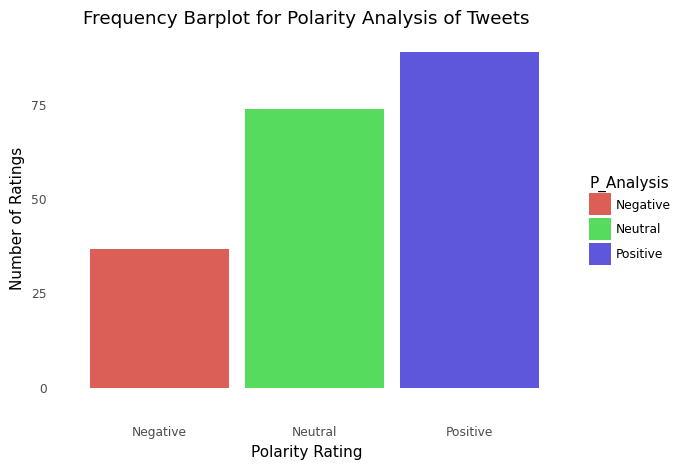

<ggplot: (8775264367437)>

In [ ]:
(ggplot(df, aes(x = 'P_Analysis', fill = 'P_Analysis')) + geom_bar()
+ ggtitle("Frequency Barplot for Polarity Analysis of Tweets") 
+ labs(x = "Polarity Rating", y = "Number of Ratings")
+ theme_minimal()
+ theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
      ))

**Visualization Analysis**

The frequency bar plot above represents the distribution of polarity ratings for the Twitter page Great Mind Quotes. 

Out of the **200** tweets that were analyzed, **89** are **positive**, **74** are **neutral**, and **37** are **negative**. This tells us that **81.5%** of the tweets being analyzed have a polarity score between **0 and 1**, inclusive, these tweets consist of neutral and positive ratings. The remaining **18.5%** of tweets in this study are classified as negative because their polarity score falls in the range of **-1 and 0**, inclusive. 

Overall, the tweets from Great Mind Quotes are primarily positive and neutral, and this is what we are looking for! The quotes we read on social media should feed our minds with positivity. However, not every quote from a "Great Mind" will be positive, which is why the large group of neutrally rated tweets are accepted in this study. 

**Frequency Barplot for Subjectivity Analysis of Tweets**

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


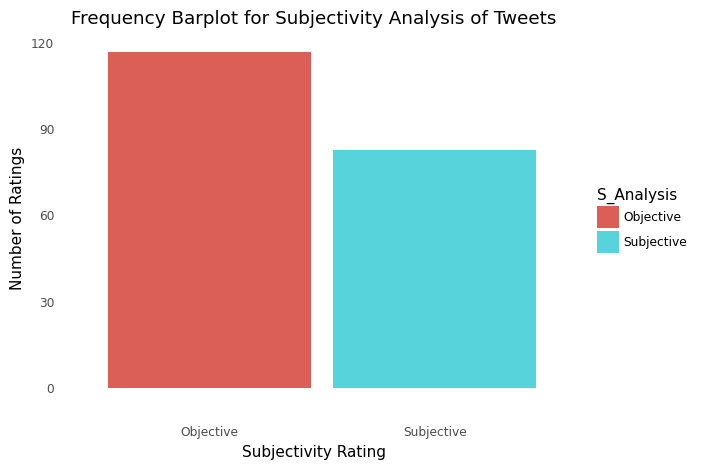

<ggplot: (8775264407941)>

In [ ]:
(ggplot(df, aes(x = 'S_Analysis', fill = 'S_Analysis')) + geom_bar()
+ ggtitle("Frequency Barplot for Subjectivity Analysis of Tweets") 
+ labs(x = "Subjectivity Rating", y = "Number of Ratings")
+ theme_minimal()
+ theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
      ))

**Visualization Analysis**

The frequency bar plot above represents the distribution of subjectivity ratings for the Twitter page Great Mind Quotes. 

Out of the **200** tweets that were analyzed, **117** are **objective** and **83** are **subjective**. This is a fairly even split as **58.5%** of tweets in this study possess a subjectivity score between **0 and 0.49**, inclusive. Additionally, **41.5%** of tweets in this study possess a subjectivity score between **0.50 and 1**, inclusive. 

All in all, the Great Mind Quotes Twitter page delivers a fair split of objective and subjective content. Famous quotes are often times generalizations that are applicable to the general population. Other times the text of a quote can be influenced by a personal belief or emotion, making the delivery sound subjective.

**Comparing Subjectivity and Polarity**

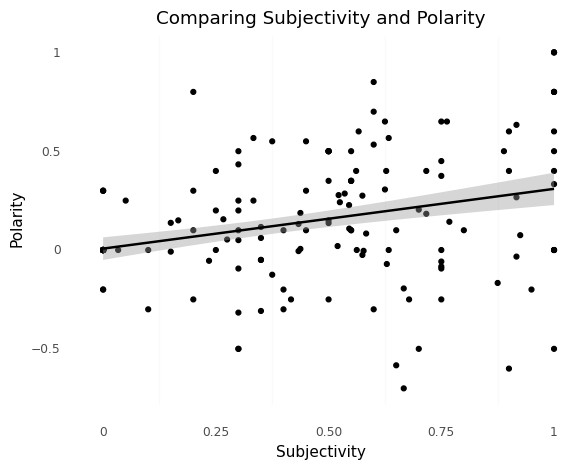

<ggplot: (8775264405625)>

In [ ]:
(ggplot(df, aes(x = 'Subjectivity', y = 'Polarity')) + geom_point()
+ ggtitle("Comparing Subjectivity and Polarity")
+ stat_smooth(method = "lm")
+ theme_minimal()
+ theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
      ))

**Visualization Analysis**

The scatterplot above represents the relationship between the subjectivity ratings and polarity ratings for the last 200 tweets from the Twitter page, Great Mind Quotes.

From first glance it can be noticed that there is a **positive linear relationship** between the subjectivity and polarity ratings. The strength of this relationship is **moderately strong** as the data is well spread out, however, there are still a **few outliers**. 

# Clustering Algorithms

*Note: Groups and Clusters will be used interchangably in the analysis.*

The two clustering algorithms that will be used to group Great Mind Quotes' last 200 tweets is K-Means and Expectation Maximization. Each algorithm is briefly introduced before examining the algorithm's model.

**Definitions and Backgroud Knowledge Below:**

**Cohesion** is the measure of how **similar** members are within a group.

**Separation** is the measure of how **different** groups are from each other.

**Silhouette Score Summary**
*   Based on two factors (Cohesion and Separation)
*   Range of possible scores is between -1 and 1
*   A score below 0 and closer to -1 means there is low cohesion and low separation in the groups
*   A score above 0 and closer to 1 means there is high cohesion and high separation in the groups

*   **High performing clustering models usually have high cohesion and high separation**









# K-Means Model

**K-Means Algorithm Quick Summary**

The K-Means algorithm is an iterative algorithm (recurring) which uses distance between data points to build groups (clusters). The only input K-Means requires is 'K', the number of clusters to create. In addition, the characteristics (variables) used to group the data must also be defined. 

**First**, the algorithm begins by choosing K random points (K is the number of groups to create). The K random points can be thought of as group leaders. **Second**, surrounding data points are assigned to the nearest group leader (solely based on distance). **Third**, an average of all data points in a cluster is taken to recalculate the center of the cluster. Lastly, the second and third step are **repeated** until there is little or no change in the clusters of the model.

**Silhouette Score**

In [ ]:
features = ["Subjectivity", "Polarity"]
X2 = df[features]

km = KMeans(n_clusters=3)
km.fit(X2)

membership = km.predict(X2)

X2["cluster"] = membership

silhouette_score(X2, membership)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.7838504204078919

**Silhouette Score Analysis**

The K-Means Algorithm produced a silhouette score of 0.7839 which means the model has high cohesion and high separation in its groups. 

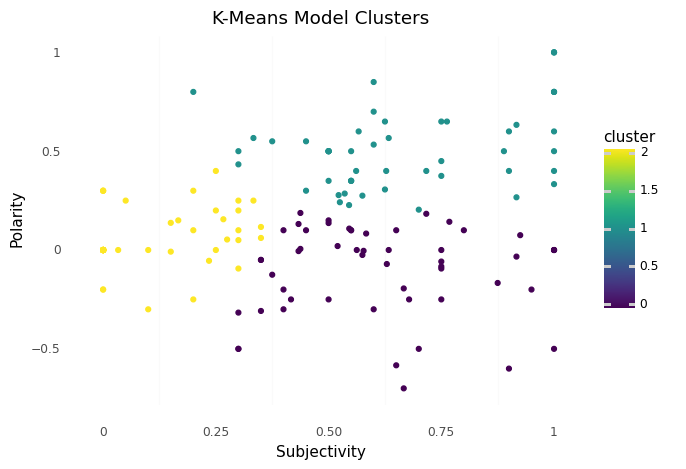

<ggplot: (8775264403529)>

In [ ]:
(ggplot(X2, aes(x = 'Subjectivity', y = 'Polarity', color='cluster')) + geom_point()
+ ggtitle("K-Means Model Clusters")
+ theme_minimal()
+ theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
      ))

**Visualization Analysis**

The K-Means model was given an input to create **three clusters**. I chose three after trying 2, 4, and 5 as inputs for the model. When testing various input values, I first examined the silhouette score, then examined the cluster membership in the scatterplot and determined how well it explained the data. In the end, three was the most optimal input value.  

**1.** Beginning with the **yellow** colored cluster, this group of tweets can be characterized as **objective** with **neutral polarity**. Example tweets for this cluster are as follows: 

1.   Give your dreams all you've got and you'll be amazed at the energy that comes out of you. - William James
2.   You can't build a reputation on what you are going to do. - Henry Ford

1.   Age is whatever you think it is. You are as old as you think you are. - Muhammad Ali

The quotes in this cluster tend to lack emotion and personability. Instead, the speech delivery of these quotes is more similar to a general statement as the tone is very directive and straight to the point.

Overall, the cluster has high cohesion and moderately high separation with no clear outliers. 

**2.** Next comes the **purple** colored cluster, this group of tweets can be characterized as **subjective** with moderately **negative polarity**. Example tweets for this group are as follows: 

1.   Time is what we want most, but what we use worst. - William Penn
2.   Twenty years from now you will be more disappointed by the things you didn't do than by the things you did. - Mark Twain

1.   	Life is really simple, but we insist on making it complicated. - Confucius

The quotes belonging to this cluster are more opinionated and have a slightly negative tone. The delivery is still directive and is interpreted as a generalization, but these quotes are more personable because they have a touch of personal opinion. 

All in all, this cluster has high cohesion and moderately high separation with a handful of outliers.

**3.** Last is the **turquoise** colored cluster, this group of tweets can be characterized as **subjective** with **positive polarity**. Example tweets for this cluster are as follows:

1.   Magic is believing in yourself, if you can do that, you can make anything happen. - Johann Wolfgang von Goethe
2.   Most of us are just about as happy as we make up our minds to be. - Abraham Lincoln

1.   The greatest mistake you can make in life is to be continually fearing you will make a mistake. - Elbert Hubbard

The turquoise colored cluster is made up of quotes which are opinionated but have a positive tone. The quotes contained in this cluster also have an optimistic tone - increasing positivity - that has not been seen in the other two clusters. 

Overall, the cluster has high cohesion high separation with a couple outliers.

# Expectation Maximization Model

**Expectation Maximization Algorithm Quick Summary**

The Expectation Maximization (EM) algorithm has many use cases, but for this study it will be used to cluster data. EM is an iterative algorithm similar to K-Means, and also follows a similar algorithmic process when creating the model. 

Although K-Means and EM follow a very similar process to build their models, there are a few important differences. First, the data points in a K-Means model all have a hard assignment to their respective cluster. This means that each data point can only belong to the nearest cluster. In Expectation Maximization, each data point has a soft assignment. Basically every data point is assigned a probability of being in each possible cluster, instead of simply assigning a data point to a cluster based on distance like K-Means. Second, K-Means assumes all clusters have equal variances and are spherically shaped. EM does not assume clusters have equal variances, instead the algorithm estimates the actual variance for each cluster. This allows for clusters to be ellipsoid shape instead of being spherical.

Expectation Maximization requires only one input, which is K, the number of clusters to create. **First**, the algorithm chooses K random points. **Second** is the expectation step, each data point calculates the probability of being in each cluster. **Third** is the maximization step, the probabilities of each data point are used to recalculate means and variances of each cluster. The second and third steps are **repeated** until there is little or no change in the clusters of the model.

**Silhouette Score**

In [ ]:
features = ["Subjectivity", "Polarity"]
X = df[features]

em = GaussianMixture(n_components=3)
em.fit(X)

membership = em.predict(X)

X['cluster_em'] = membership

silhouette_score(X, membership)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.7620761964670638

**Silhouette Score Analysis**

The Expectation Maximization model produced a silhouette score of 0.7621 which means the model has high cohesion and high separation in its groups. This score is slightly lower than the silhouette score produced by the K-Means model.

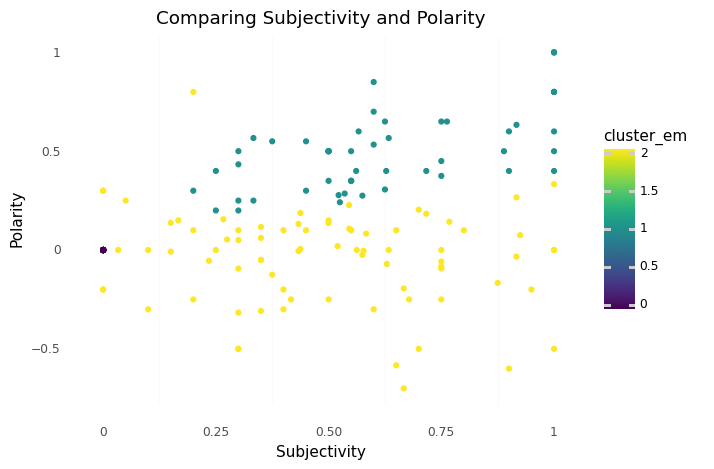

<ggplot: (8775264450325)>

In [ ]:
(ggplot(X, aes(x = 'Subjectivity', y = 'Polarity', color='cluster_em')) + geom_point()
+ ggtitle("Comparing Subjectivity and Polarity")
+ theme_minimal()
+ theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
      ))

**Visualization Analysis**

The Expectation Maximization (EM) model was given an input to create three clusters. I chose three because the K-Means model was given three as the input, and I wanted to see how the EM model would compare against the K-Means model given the same dataset and input value. 

**1.** Beginning with the **purple** cluster, since EM determines group membership based on probabilities instead of distances, this cluster is barely visible in the scatterplot above. The reason for this is because 65 out of 200 tweets have a subjectivity and polarity score of 0.0. As a result, all 65 datapoints form the purple cluster.

This cluster can be characterized as **objective** with **neutral** **polarity**. Example tweets for this group are as follows:

1.   Some people want it to happen, some wish it would happen, others make it happen. - Michael Jordan
2.   What is not started today is never finished tomorrow. - Johann Wolfgang von Goethe

1.   When we get too caught up in the busyness of the world we lose connection with one another and ourselves. - Jack Kornfield

The quotes belonging to this cluster lack personability, as there is not a sense of personal belief or emotion. In addition, these quotes are very neutral in their tone as they are not negative or positive. 

All in all, this cluster has extremely high cohesion and separation with zero outliers. However, this group has no variance compared to the other groups, and that makes the purple cluster represent a very specific niche of tweets. Unfortunately, this does impact the other clusters in the EM model because they have to explain significantly more data with higher variance.

**2.** Next comes the **yellow** colored cluster, this group of tweets is a little more difficult to characterize as the **subjectivity** rating distribution is **spread across** the range of **0 to 1**. Furthermore, this cluster contains primarily **neutral** to **negative polarity** rated tweets. Example tweets for this cluster are as follows:

1.   I can't believe that God put us on this earth to be ordinary. - Lou Holtz
2.   I do not like to repeat successes; I like to go on to other things. - Walt Disney

2.   If you think education is expensive, try ignorance. - Derek Bok

Quotes that compose this group are more subjective because they are influenced by personal beliefs/emotions. In addition, these quotes have a negative polarity rating attached to them because of phrases such as, "can't believe" or "do not like". These phrases lower the polarity score of a quote.

Overall, this cluster has moderate cohesion and moderate separation with a handful of outliers. Due to the purple cluster being extremely condensed, there is significantly greater variance in this cluster. As a result, the cluster represents a larger portion of the data which weakens the cohesion (similarity) between the members of this cluster.

**3.** Last is the **turquoise** colored cluster, these quotes can be characterized as mostly **subjective** with **positive** **polarity**. Example quotes for this group are as follows:


1.   Now is the time. Needs are great, but your possibilities are greater. - Bill Blackman
2.   	I have not failed. I've just found 10,000 ways that won't work. - Thomas Edison

2.   What we have learned from others becomes our own reflection. - Ralph Waldo Emerson

Similar to the yellow cluster, this turquoise colored cluster is composed of primarily subjective quotes, but they also have very positive polarity. The delivery of these quotes gives the reader an optimistic feeling due to the high positivity. In addition, these quotes are subjective because most of them are not a directive statement for the common person, instead they have a personal belief/emotion attached to the quote.


All in all, this cluster has moderate cohesion and moderate separation with a couple outliers. Also, due to the purple cluster having zero variance, this cluster inherits a greater number of quotes, which weakens the cohesion (similarity) of the group.

# Analysis of Final Decision

**Conclusion**

In the final analysis of this exploration I aim to determine which algorithm does a finer job at grouping the tweets from the Great Mind Quotes Twitter page. 

Ultimately, the **K-Means** algorithm is a **stronger option** to cluster the last 200 tweets from the Great Mind Quotes page. The three clusters created by the K-Means algorithm have equal variances and each group is easier to characterize because the groups are more compact in comparison to the EM model. This allows each K-Means cluster to represent a certain class of quotes in terms of subjectivity and polarity. 

Each of the three clusters created by the Expectation Maximization algorithm have different variances, and that makes characterizing EM groups difficult for this dataset. For example, 65 of 200 tweets have a subjectivity and polarity score of 0.0, and these tweets form the purple cluster. The purple cluster has extremely high cohesion/separation with zero variance and, as a result, the other two clusters in the EM model have more data to explain.

The entire purpose of this exploration was to use Sentimental Analysis on Twitter quotes, and apply clustering algorithms to determine the various groups of quotes for the Twitter page Great Mind Quotes. Replicating this exploration gives an individual the ability to determine the type of content they are publishing on their Twitter page in terms of overall positivity/negativity and objectivity/subjectivity. In addition, Twitter data can be grouped by applying clustering algorithms to determine the characteristics of groups for the data.

**Limitations** 

The dataset for this exploration only consisted of the last 200 tweets posted on the Great Mind Quotes page. On average about 10 to 12 quotes are posted on the page per day so the dataset represents the last 16 to 20 days of tweets from the Great Mind Quotes page. This selected Twitter page has existed since February 2009 and has over 36,200 tweets posted today (01/25/2022). It is possible that the quotes that were posted to this page in previous years are not primarily positive and objective. In previous years the page could have been posting quotes that contain a different tone and serve a different purpose than today. For this reason, a dataset with a few thousand quotes is necessary to gain a greater understanding of the overall subjectivity and polarity of the Twitter page. 

**Shortcomings and Future** 

The main shortcoming of this exploration is not removing stop words (ex. "a", "the", "are", etc.) from the data. By removing stop words the subjectivtiy and polarity scores of the quotes could have been different and possibly improved.

Some future additions that I would like to add to this exploration are listed below: 

*   Remove stop words from the data.
*   Use the NLTK Python Library.

*   Source thousands of tweets and see how the results compare to a dataset with 200 tweets.